
FireFly [Class-Dim=2]:  0.000365764387288191




2022-12-01 18:25:54,332 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



FireFly [Library-Dim=2]:  [-0.005684864694907477, -0.006416894094928696]




pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=6.36e-43
2022-12-01 18:25:57,442 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.359894886592698e-43, best pos: [-7.03831087e-22  3.74981718e-22]


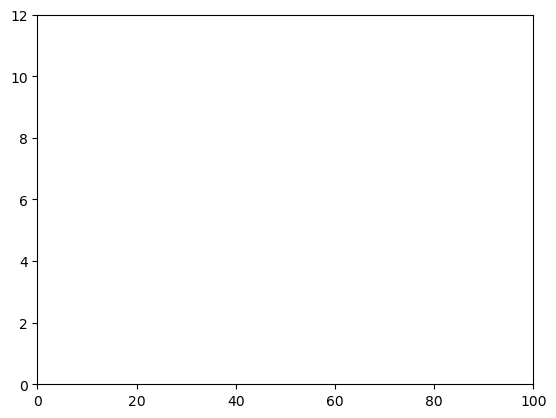

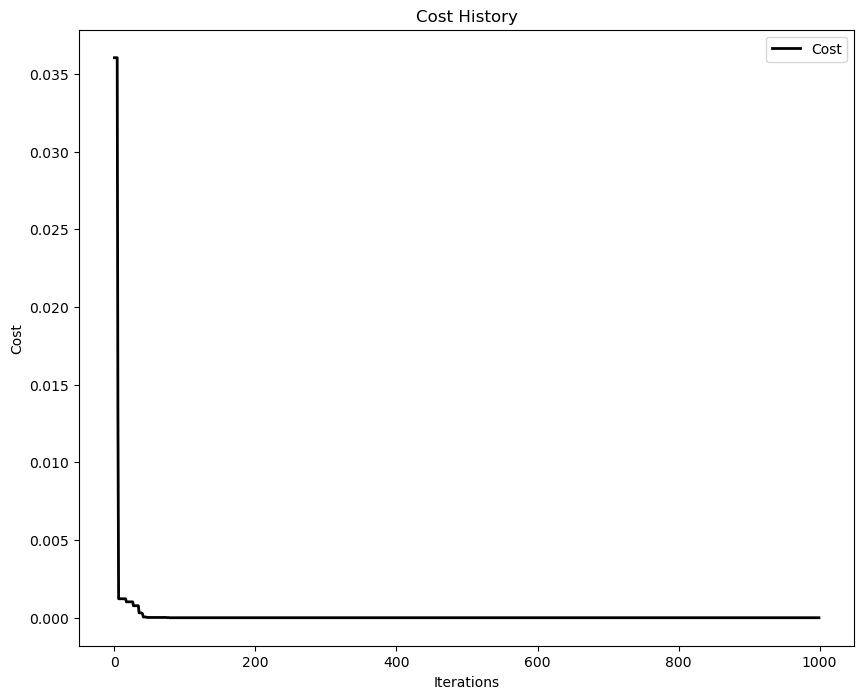


FireFly [Class-Dim=3]:  0.15099620710960876




2022-12-01 18:25:59,990 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



FireFly [Library-Dim=3]:  [-0.07582595369019407, 0.08884957004786814, 0.13954564417281898]




pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=8.08e-40
2022-12-01 18:26:02,956 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.07912578175656e-40, best pos: [-2.83881802e-20  1.41292201e-21  1.65695777e-22]



Ackley [Class-Dim=2]:  1.1099704412892888




2022-12-01 18:26:04,696 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



Ackley [Library-Dim=2]:  [-0.024708901312493425, -0.11273231930659294]




pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=4.44e-16
2022-12-01 18:26:08,024 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.440892098500626e-16, best pos: [2.56682004e-16 6.75525382e-18]



Ackley [Class-Dim=3]:  1.2873556542271491




2022-12-01 18:26:09,997 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



Ackley [Library-Dim=3]:  [5.410670073730706, 5.1006146069029255, -0.22618287398522993]




pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=4.44e-16
2022-12-01 18:26:13,110 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.440892098500626e-16, best pos: [ 1.02359221e-16 -4.60860547e-16 -8.59055848e-17]


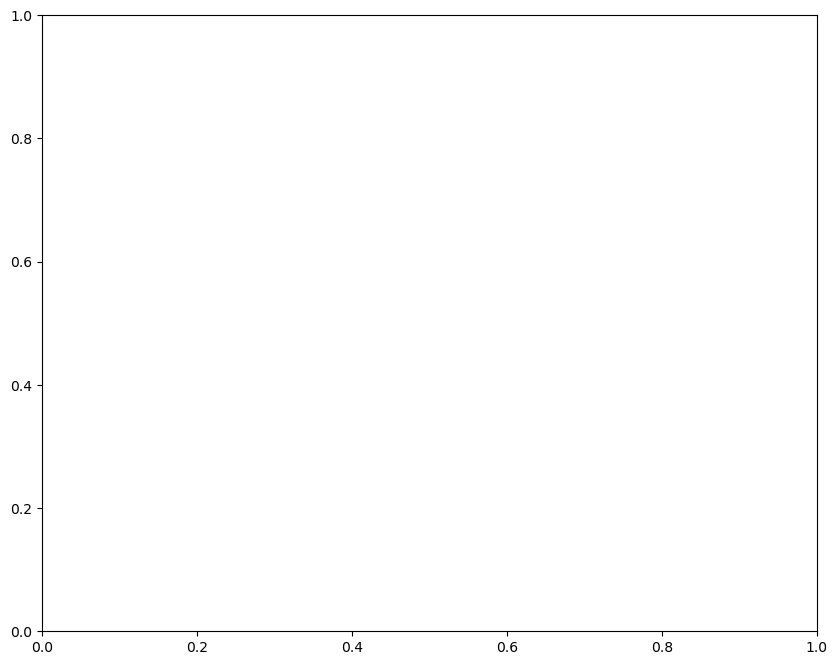

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Mesher, Designer

# Import SwearmPackagePy
import SwarmPackagePy
from SwarmPackagePy import testFunctions as tf

# Import class FireflyAlgorithm
from FireflyAlgorithm import FireflyAlgorithm 

x = []
y = []
  
figure, ax = plt.subplots()
  
# Setting limits for x and y axis
ax.set_xlim(0, 100)
ax.set_ylim(0, 12)
  
# Since plotting a single graph
line,  = ax.plot(0, 0) 
  
def animation_function(i):
    x.append(i * 15)
    y.append(i)
  
    line.set_xdata(x)
    line.set_ydata(y)
    return line,

def sphere(x):
    """Sphere objective function.
    Has a global minimum at :code:`0` and with a search domain of
        :code:`[-inf, inf]`
    Parameters
    ----------
    x : numpy.ndarray
        set of inputs of shape :code:`(n_particles, dimensions)`
    Returns
    -------
    numpy.ndarray
        computed cost of size :code:`(n_particles, )`
    """
    j = (x ** 2.0).sum(axis=0)

    return j

def ackley(x):
    """Ackley's objective function.
    Has a global minimum of `0` at :code:`f(0,0,...,0)` with a search
    domain of [-32, 32]
    Parameters
    ----------
    x : numpy.ndarray
        set of inputs of shape :code:`(n_particles, dimensions)`
    Returns
    -------
    numpy.ndarray
        computed cost of size :code:`(n_particles, )`
    ------
    ValueError
        When the input is out of bounds with respect to the function
        domain
    """
    if not np.logical_and(x >= -32, x <= 32).all():
        raise ValueError("Input for Ackley function must be within [-32, 32].")

    d = x.shape[0]
    j = (
        -20.0 * np.exp(-0.2 * np.sqrt((1 / d) * (x ** 2).sum(axis=0)))
        - np.exp((1 / float(d)) * np.cos(2 * np.pi * x).sum(axis=0))
        + 20.0
        + np.exp(1)
    )

    return j

           
FA = FireflyAlgorithm()

# Set-up hyperparameters
#c1 - cognitive parameter
#c2 - social parameter
#c3 - inertica parameter
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)#A dimensao não é definida por nós, é a dimensao do problema

#Firefly - Class
best = FA.run(function=sphere, dim=2, lb=-5, ub=5, max_evals=1000) # lb e ub representa os limites inferiores e superiores
print("\nFireFly [Class-Dim=2]: ",best)
print("\n")

#Firefly - Library
alh = SwarmPackagePy.fa(10,tf.sphere_function, -5, 5, 2, 1000, 1, 1, 1, 0.1, 0, 0.1)
print("\nFireFly [Library-Dim=2]: ",alh.get_Gbest()) #Retorna a melhor posição do algoritmo
#print("Agentes: ",alh.get_agents()) #Retorna um histórico de todos os agentes do algoritmo 
print("\n")

#animation = FuncAnimation(alh.get_agents(), sphere, .5, 5, sr=False)
#plt.show()

# Perform optimizations sphere
cost,pos = optimizer.optimize(fx.sphere, iters=1000)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere,
           limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])
pos_history_3d = m.compute_history_3d(optimizer.pos_history) # preprocessing
animation3d = plot_surface(pos_history=pos_history_3d,
                           mesher=m, designer=d,
                           mark=(0,0,0))    

  
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options)#A dimensao não é definida por nós, é a dimensao do problema
best = FA.run(function=sphere, dim=3, lb=-5, ub=5, max_evals=1000) # lb e ub representa os limites inferiors e superiores
print("\nFireFly [Class-Dim=3]: ",best)
print("\n")

alh = SwarmPackagePy.fa(10,tf.sphere_function, -5, 5, 3, 1000, 1, 1, 1, 0.1, 0, 0.1)
print("\nFireFly [Library-Dim=3]: ",alh.get_Gbest())
print("\n")
# Perform optimizationsphere
cost,pos = optimizer.optimize(fx.sphere, iters=1000)


# ================================================================== ACKLEY ================================================================== #

# Set-up hyperparameters
#c1 - cognitive parameter
#c2 - social parameter
#c3 - inertica parameter
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)#A dimensao não é definida por nós, é a dimensao do problema
best = FA.run(function=ackley, dim=2, lb=-5, ub=5, max_evals=1000) # lb e ub representa os limites inferiors e superiores
print("\nAckley [Class-Dim=2]: ",best)
print("\n")

alh = SwarmPackagePy.fa(10,tf.ackley_function, -5, 5, 2, 1000, 1, 1, 1, 0.1, 0, 0.1)
print("\nAckley [Library-Dim=2]: ",alh.get_Gbest()) #Retorna as cordenadas x,y
print("\n")
# Perform optimizationsphere
cost,pos = optimizer.optimize(fx.ackley, iters=1000)

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options)#A dimensao não é definida por nós, é a dimensao do problema
best = FA.run(function=ackley, dim=3, lb=-5, ub=5, max_evals=1000) # lb e ub representa os limites inferiors e superiores
print("\nAckley [Class-Dim=3]: ",best)
print("\n")

alh = SwarmPackagePy.fa(10,tf.ackley_function, -5, 5, 3, 1000, 1, 1, 1, 0.1, 0, 0.1)
print("\nAckley [Library-Dim=3]: ",alh.get_Gbest())
print("\n")
# Perform optimizationsphere
cost,pos = optimizer.optimize(fx.ackley, iters=1000)






